### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: 'China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel

In [1]:
from covid_top import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


/isibhv/projects/p_aicore/lphan/CodeRepo/Github/ML-Practices/18_Covid-19/covid_top.py:50: RuntimeWarning: invalid value encountered in double_scalars
  y_dat_ratioConfPop[country] = np.round(countries_confirmed[country].iloc[-1]/country_pop_dict[country]*100, 4)
/isibhv/projects/p_aicore/lphan/CodeRepo/Github/ML-Practices/18_Covid-19/covid_top.py:67: RuntimeWarning: invalid value encountered in double_scalars
  y_dat_ratioDeathPop[country] = np.round(countries_fatalities[country].iloc[-1]/country_pop_dict[country]*100, 4)
/isibhv/projects/p_aicore/lphan/CodeRepo/Github/ML-Practices/18_Covid-19/covid_top.py:75: RuntimeWarning: invalid value encountered in double_scalars
  y_dat_ratioRecConf[country] = np.round((countries_recovered[country].iloc[-1]/countries_confirmed[country].iloc[-1])*100, 4)


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(data)

424

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'03-20-2021'

In [4]:
print("Total recovered first day: ", totalrecovered_by_day[0])
print("Total recovered last day: ", totalrecovered_by_day[-1])

Total recovered first day:  30.0
Total recovered last day:  69523089.0


### New Recovered in the World changed by day

('Last day Increasing', 258149.0)

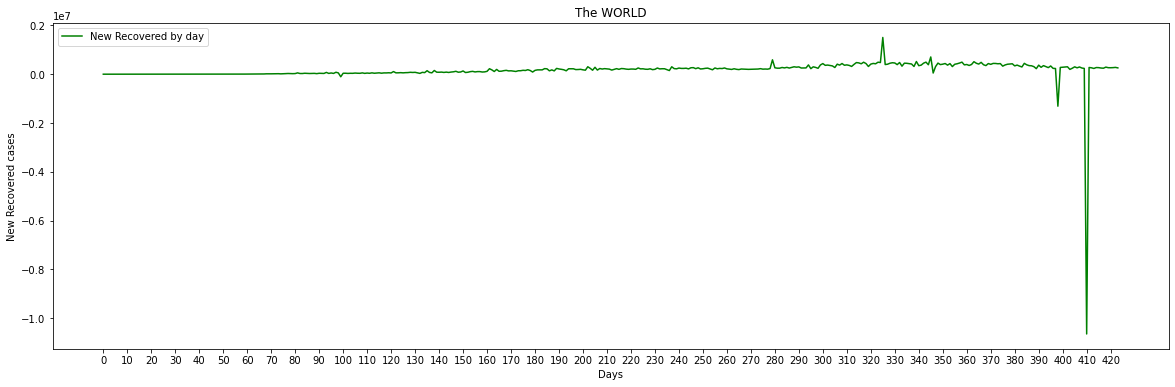

In [5]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, newRecoveredByDay, color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.title("The WORLD")
plt.legend(loc='upper left')

('Last day Increasing', totalrecovered_by_day[-1]-totalrecovered_by_day[-2])

##### NOTE: THERE IS DATA BIAS AT DAY 98

### Number of RECOVERED in the World from day 0 to latest day

Ratio recovered over Confirmed in last day (%):  56.609
Highest Ratio until now (%):  69.75


('Total Recovered until now: ', 69523089.0)

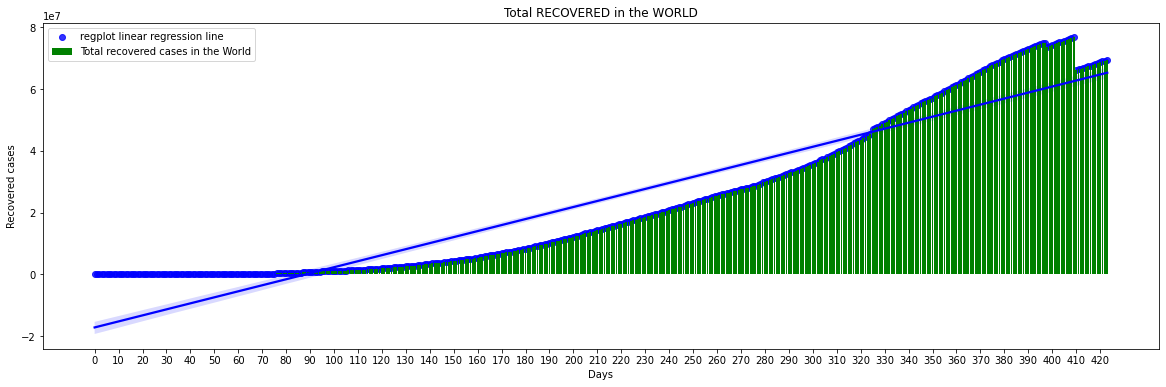

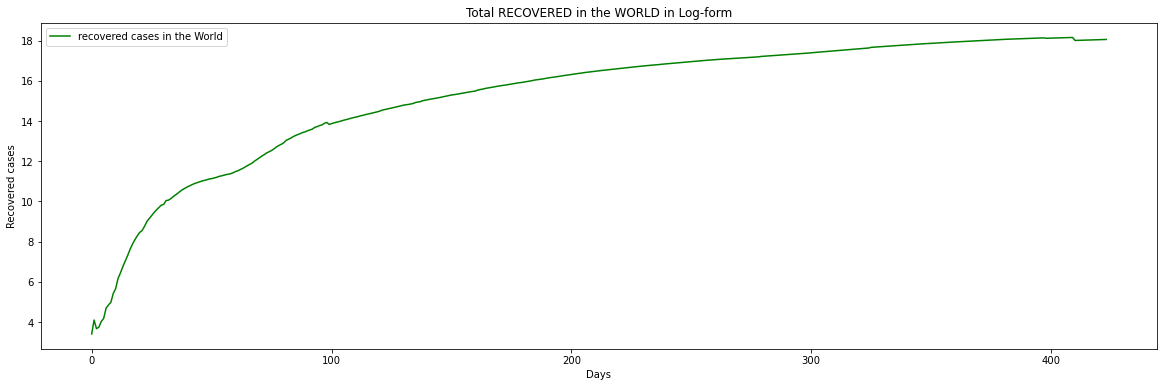

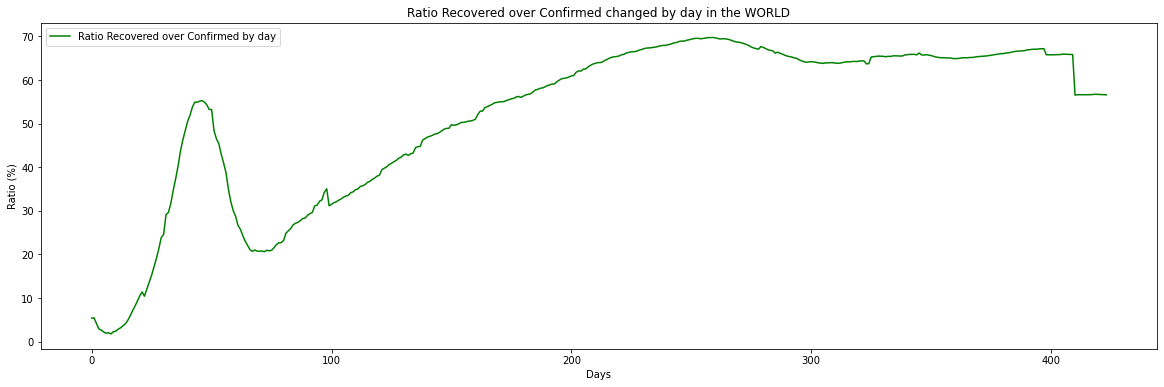

In [6]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, totalrecovered_by_day, color='green', label='Total recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
ax = sns.regplot(x=x_dat, y=totalrecovered_by_day, ci=95, label="regplot linear regression line", color="blue")
ax.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD")

plt.figure(2)
plt.plot(x_dat, np.log(totalrecovered_by_day), color='green', label='recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD in Log-form")

plt.figure(3)
plt.plot(x_dat, ratioRecByDay, color='green', label='Ratio Recovered over Confirmed by day')
plt.xlabel('Days')
plt.ylabel('Ratio (%)')
plt.title("Ratio Recovered over Confirmed changed by day in the WORLD")
plt.legend(loc='upper left')

print("Ratio recovered over Confirmed in last day (%): ", ratioRecByDay[-1])
print('Highest Ratio until now (%): ', np.max(ratioRecByDay))
('Total Recovered until now: ', totalrecovered_by_day[-1])

,China,Germany,Italy,"Korea, South",Japan,US,Australia,Luxembourg,United Kingdom,Canada,Vietnam,Israel
0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
419,96087.0,2387232.0,2619654.0,88814.0,427426.0,0.0,22960.0,54528.0,12013.0,867542.0,2158.0,790340.0
420,96123.0,2387743.0,2639370.0,89178.0,428627.0,0.0,22962.0,54666.0,12053.0,870725.0,2198.0,793723.0
421,96154.0,2405600.0,2655346.0,89523.0,429742.0,0.0,22963.0,54935.0,12086.0,873615.0,2198.0,798096.0
422,96173.0,2413584.0,2671638.0,89949.0,430771.0,0.0,22965.0,55147.0,12130.0,876936.0,2198.0,800514.0


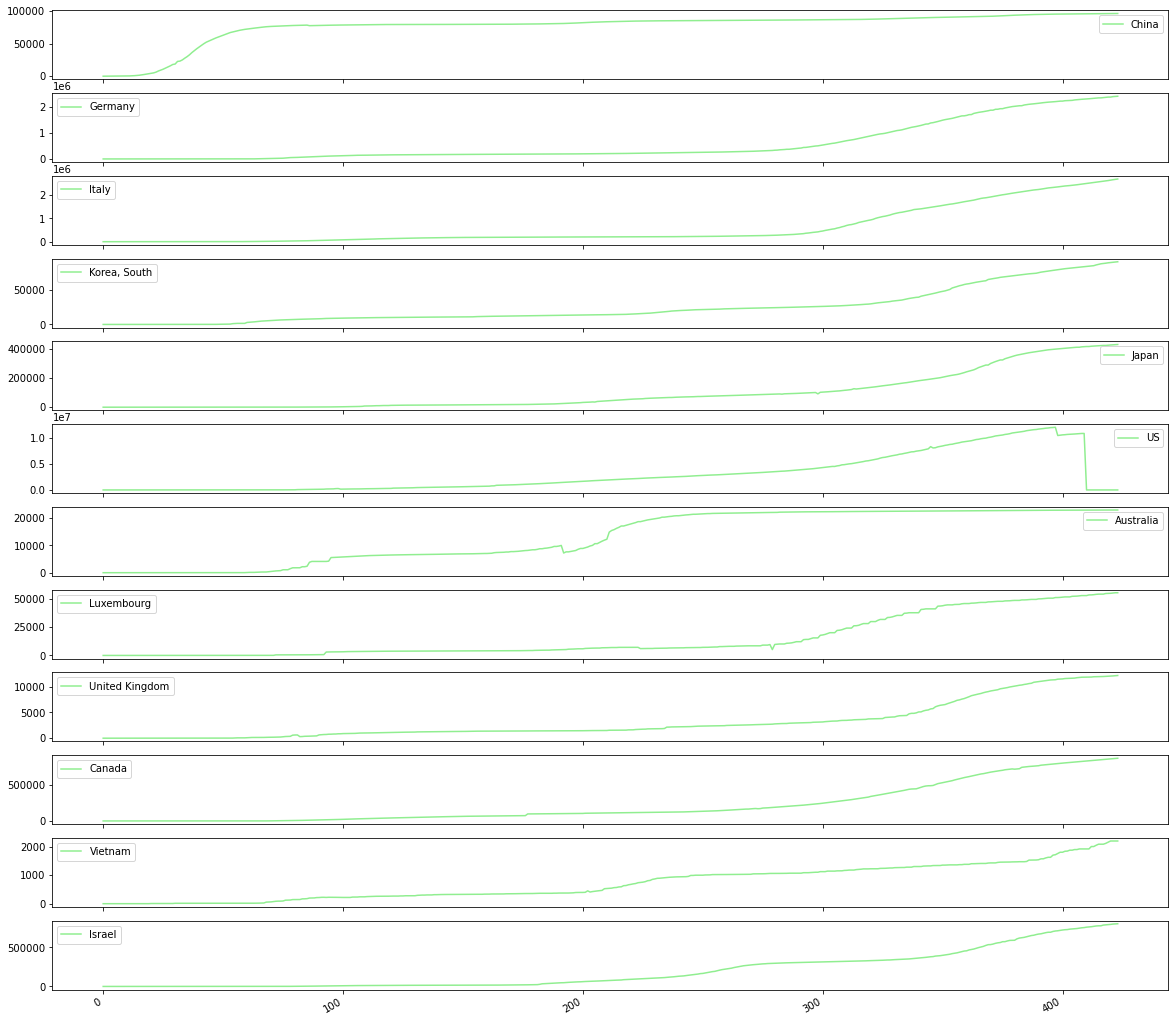

In [7]:
# from pandas import Grouper
countries = ['China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel']

rcParams['figure.figsize'] = 20, 20
countries_recovered[countries].plot(subplots=True, legend=True, color='lightgreen')
countries_recovered[countries]

,China,Germany,Italy,"Korea, South",Japan,US,Australia,Luxembourg,United Kingdom,Canada,Vietnam,Israel
Last day Increasing,35.0,5708.0,14598.0,379.0,1201.0,0.0,1.0,0.0,37.0,2581.0,0.0,1609.0
Total Recovered until yesterday,96208.0,2419292.0,2686236.0,90328.0,431972.0,0.0,22966.0,55147.0,12167.0,879517.0,2198.0,802123.0
Highest Number,3994.0,44517.0,39266.0,2143.0,10998.0,425878.0,2606.0,4523.0,350.0,23848.0,84.0,18322.0


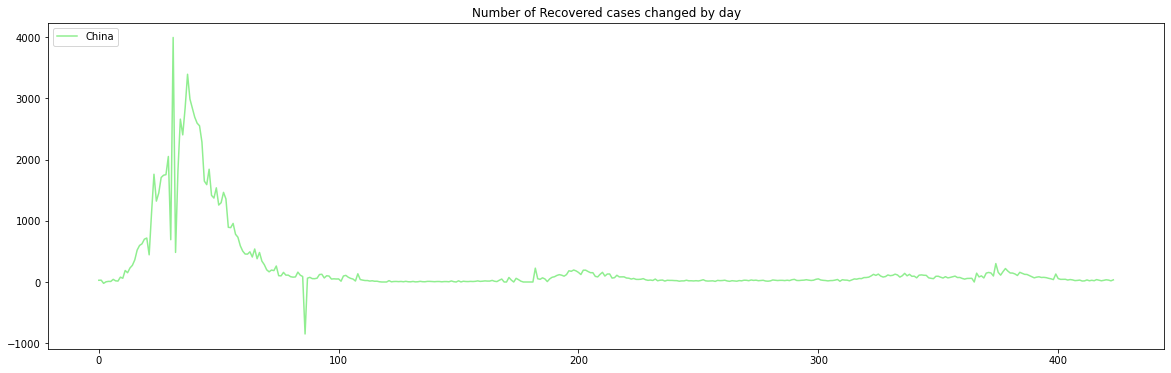

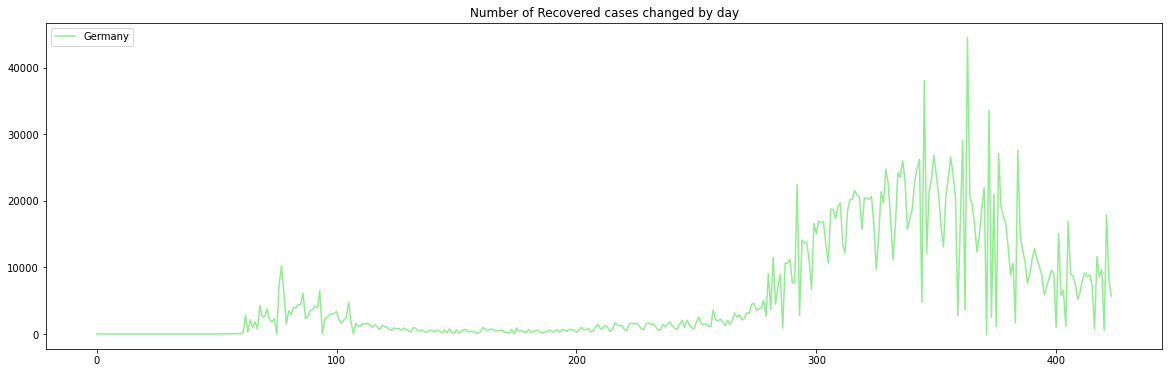

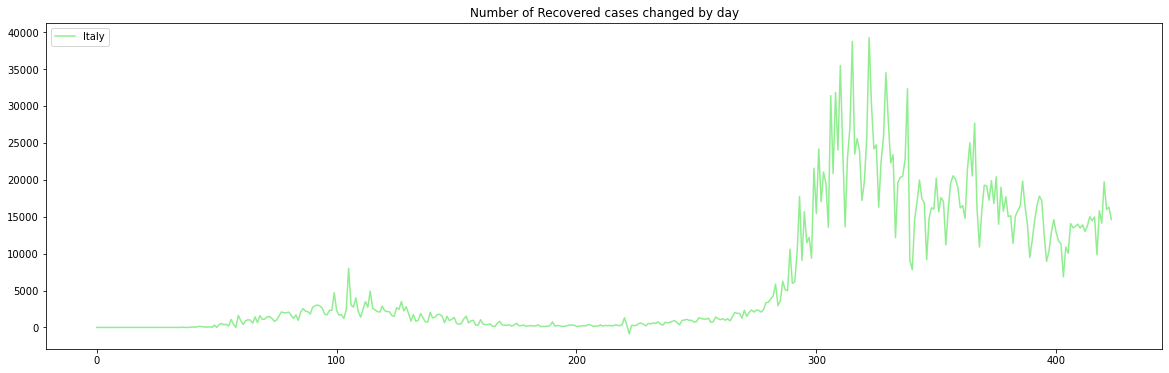

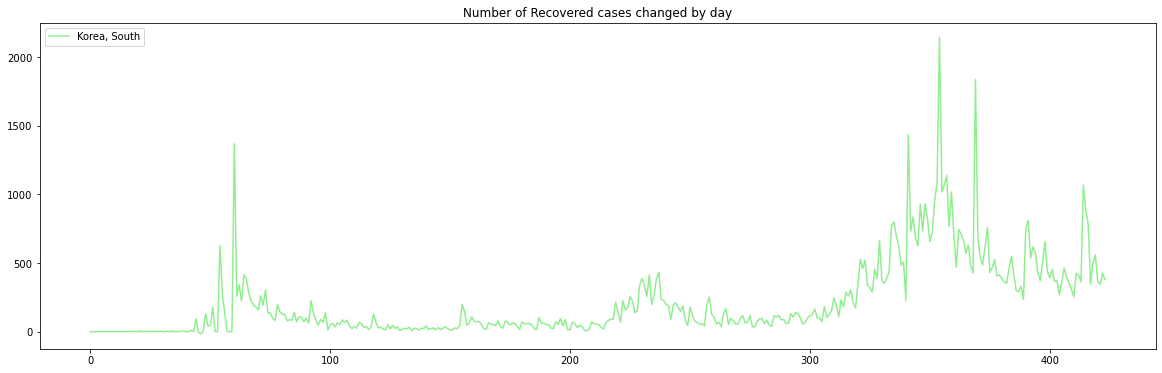

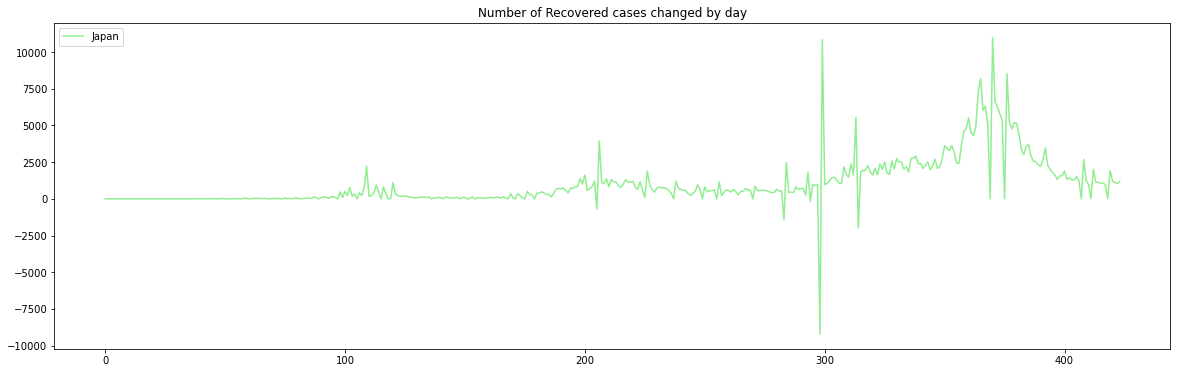

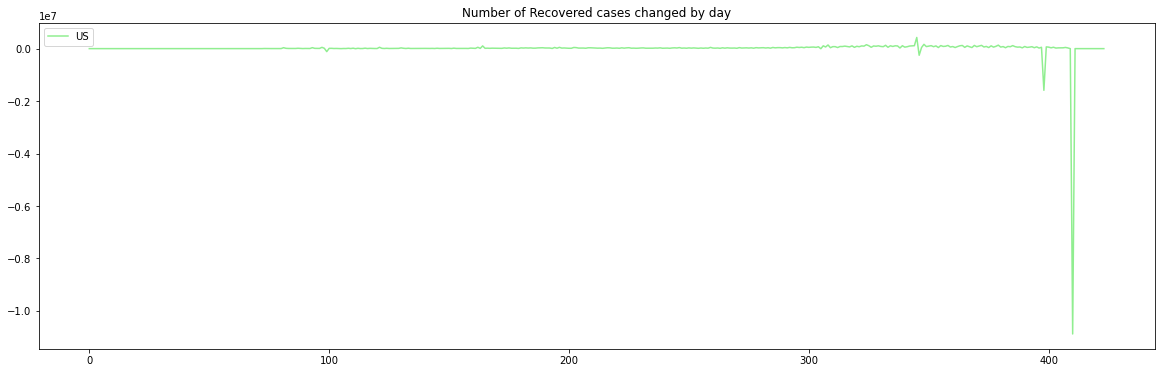

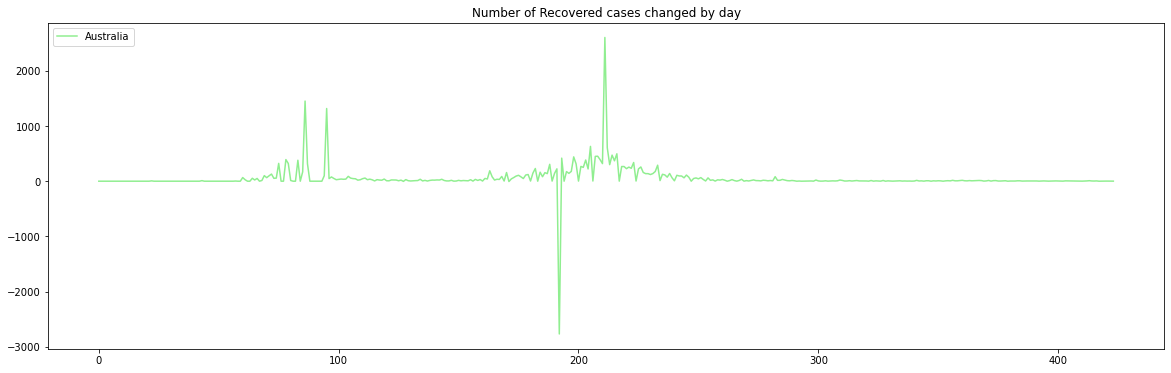

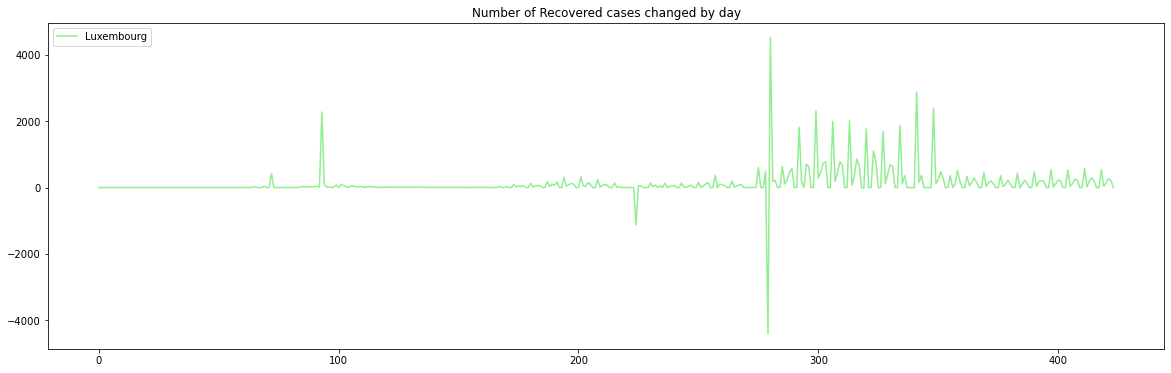

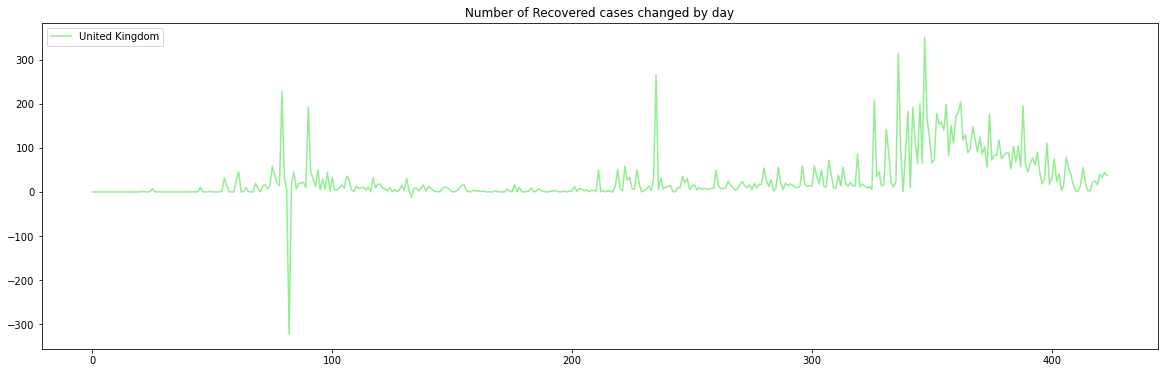

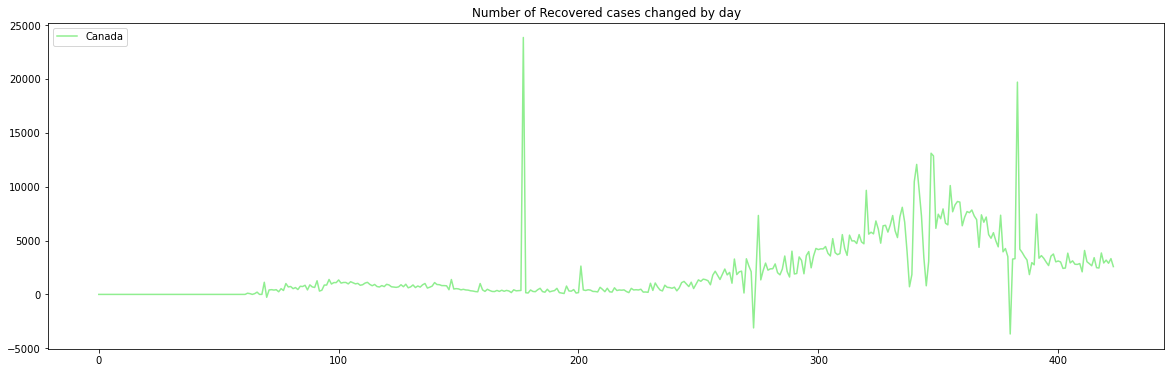

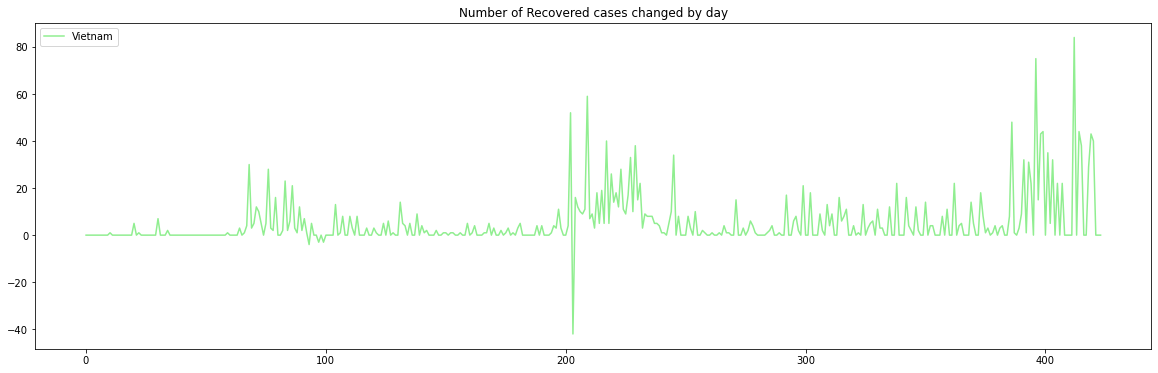

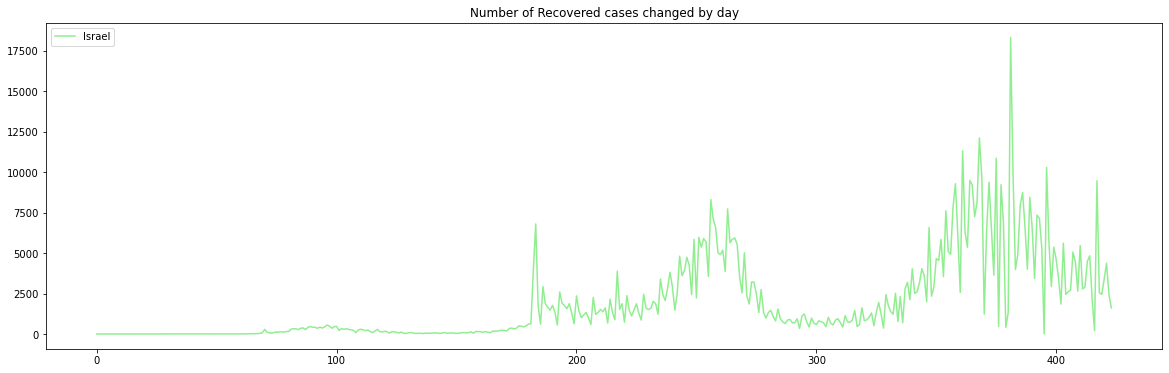

In [8]:
countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Recovered until yesterday', 'Highest Number'])

for country in countries:
    countriesdf[country] = [countries_recovered_by_day[country].iloc[-1], countries_recovered[country].iloc[-1], 
                            countries_recovered_by_day[country].max()]
    
figure = 1
rcParams['figure.figsize'] = 20, 6

for country in countries:    
    plt.figure(figure)
    countries_recovered_by_day[country].plot(color='lightgreen', label=country)
    plt.title("Number of Recovered cases changed by day")
    plt.legend(loc='upper left')
    figure = figure+1

countriesdf

#### There are bias data found when you see the scattered plot shows the negative values (<0).